# Quantum Clustering with Quantum Computing

## Introduction to Clustering and Quantum Clustering

### Unsupervised machine learning

Unsupervised machine learning is a branch of machine learning where the algorithm is given data without explicit labels or target values. The goal is to discover hidden patterns, groupings, or structures within the data automatically. One of the most common and important tasks in unsupervised learning is clustering, where the aim is to group similar data points together based on their features



Clustering is a fundamental technique in unsupervised machine learning that groups similar data points together based on their features. Clustering is a cornerstone of unsupervised learning, yet classical algorithms like K-means face key limitations — especially when dealing with high-dimensional, non-linearly separable, or noisy data. These challenges stem from K-means' reliance on simple geometric distance (e.g., Euclidean) and iterative, often suboptimal convergence.

Quantum computing offers a fundamentally different toolkit. By encoding data into quantum states and using quantum-native operations like the Swap Test for similarity measurement, we can potentially explore patterns in data with greater expressiveness, parallelism, and efficiency — especially as quantum hardware evolves.

This notebook demonstrates how quantum principles can be applied to clustering, from encoding classical data into quantum circuits to comparing the results of quantum K-means with its classical counterpart.

In this module, we'll explore how to implement clustering algorithms using quantum computing, focusing on quantum versions of k-means and related techniques. We'll learn about:

1. Classical k-means clustering and its limitations
2. Quantum data encoding strategies
3. Quantum k-means algorithm implementation
4. Analyzing and visualizing results

As datasets grow in size and complexity, traditional clustering methods like K-means often struggle with efficiency and accuracy—especially in high-dimensional or non-linearly separable data. This notebook explores how quantum computing can enhance clustering through novel approaches grounded in quantum mechanics.

We begin with a baseline implementation of the classical K-means algorithm, followed by an exploration of how quantum systems can represent and process data using quantum data encoding strategies. Leveraging these encodings, we implement a quantum variant of the K-means algorithm, where quantum states are used to represent data points and cluster centroids.

A key component of this approach is the Swap Test, a quantum algorithm used to compute distances between quantum states. This test enables us to evaluate similarity in a fundamentally different way compared to classical Euclidean distance.

The notebook concludes with a side-by-side comparison of classical and quantum clustering methods using performance metrics such as:

- Silhouette Score (measuring cluster cohesion and separation)

- Runtime Efficiency

- Visual Comparison of Cluster Assignments

By the end, this notebook offers a hands-on look at how quantum computing may unlock new possibilities in unsupervised learning, particularly in the realm of clustering. It serves as both a practical demonstration and a conceptual guide for anyone interested in the intersection of quantum algorithms and machine learning.

## 1. Classical K-means Clustering

Let's first review classical k-means clustering to understand the foundation before moving to quantum implementations.

K-means is an **unsupervised machine learning algorithm** that partitions a dataset into **K distinct, non-overlapping clusters** based on **feature similarity**. Each cluster is defined by a **centroid**, which is the **mean point** of all the samples in that cluster.

### Mathematical Objective

K-means aims to minimize the total intra-cluster variance, which is the sum of squared distances between each point and its assigned cluster centroid:

**Minimize:**  
$$J = \sum_{i=1}^{K} \sum_{x \in C_i} \|x - \mu_i\|^2$$

**Where:**
- $K$: Number of clusters  
- $C_i$: Set of points in cluster $i$  
- $\mu_i$: Centroid of cluster $i$  
- $\|x - \mu_i\|^2$: Squared Euclidean distance between point $x$ and centroid $\mu_i$

### K-means Algorithm Step-by-Step

The algorithm works through the following steps:

1. **Choose K**: Decide how many clusters (K) you want
2. **Initialize Centroids**: Randomly select K data points as initial centroids μ₁, μ₂, ..., μₖ
3. **Assign Points to the Nearest Centroid**: For each point x, compute the distance to each centroid and assign it to the closest (i = argminⱼ ||x − μⱼ||)
4. **Update Centroids**: Recompute the centroid of each cluster as the mean of all points assigned to it (μᵢ = (1 / |Cᵢ|) × Σ (x ∈ Cᵢ) x)
5. **Repeat**: Iterate steps 3 and 4 until centroids stop changing (i.e., convergence)

### Pseudocode for K-means

```
# Input: Dataset X with n data points, and number of clusters K

Initialize K random centroids

repeat:
    # Assignment step
    for each data point x in X:
        assign x to the nearest centroid

    # Update step
    for each cluster i in 1 to K:
        recalculate centroid μ_i as the mean of all points assigned to it

until centroids do not change (or change is very small)
```

Let's implement a simple version of classical k-means to demonstrate:

In [27]:
%pip install qiskit==1.4.3 --quiet
%pip install qiskit-algorithms --quiet
%pip install matplotlib --quiet
%pip install pylatexenc --quiet
%pip install scipy --quiet
%pip install -U scikit-learn --quiet
%pip install qiskit-aer --quiet
%pip install ipywidgets --quiet


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgr

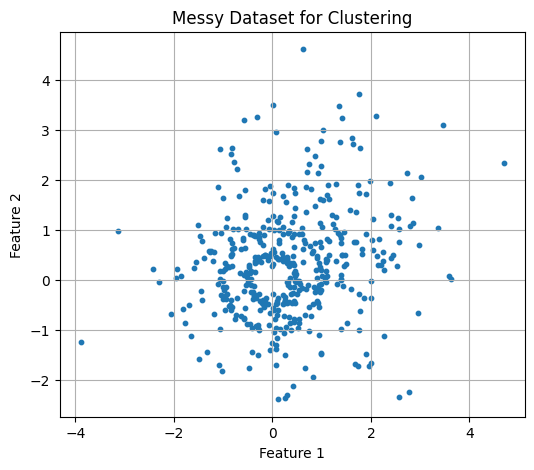

Classical Runtime: 0.0795 sec
Classical Silhouette Score: 0.3637


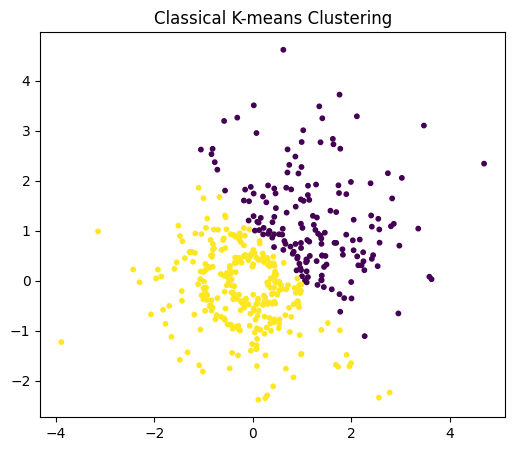

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.cluster import KMeans
import numpy as np
import time
from sklearn.metrics import silhouette_score

# Using synthetic data for demonstration purposes
# Create a messy dataset with overlapping blobs and circular non-linear data

# Overlapping blobs
X1, _ = make_blobs(n_samples=300, centers=[[0, 0], [1, 1]], cluster_std=1.2, random_state=42)

# Circular non-linear data
X2, _ = make_circles(n_samples=150, factor=0.5, noise=0.05)

# Combine and shuffle
X = np.vstack([X1, X2])
np.random.shuffle(X)

# Visualize the data
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title('Messy Dataset for Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

# Apply classical k-means
start_time = time.time()
kmeans = KMeans(n_clusters=2, random_state=42)
classical_labels = kmeans.fit_predict(X)
classical_runtime = time.time() - start_time
classical_silhouette = silhouette_score(X, classical_labels)

print(f"Classical Runtime: {classical_runtime:.4f} sec")
print(f"Classical Silhouette Score: {classical_silhouette:.4f}")

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=classical_labels, cmap='viridis', s=10)
plt.title('Classical K-means Clustering')
plt.show()

## Parameter Exploration: Interactive K-means Cluster Count

You can explore how changing the number of clusters affects the classical K-means clustering results using the interactive widget below. Try different values and observe how the clustering changes!

In [2]:
from ipywidgets import interact, IntSlider

@interact(n_clusters=IntSlider(min=2, max=6, step=1, value=2))
def plot_kmeans_clusters(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    plt.figure(figsize=(6, 5))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
    plt.title(f'Classical K-means with {n_clusters} Clusters')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.show()

interactive(children=(IntSlider(value=2, description='n_clusters', max=6, min=2), Output()), _dom_classes=('wi…

### Limitations of Classical K-means

Classical k-means has several limitations:
1. The algorithm can get stuck in local minima
2. Results depend on the initial centroids
3. The computational complexity increases significantly with dataset size
4. It struggles with non-linearly separable data

Quantum computing may help address some of these limitations.

In [3]:
from helpers import create_kmeans_quiz
create_kmeans_quiz()

HTML(value='\n        <style>\n        .widget-label-basic {\n            overflow: visible !important;\n     …

## 2. Quantum Data Encoding Strategies

Quantum computers do not natively understand classical data. Therefore, the first and most crucial step is to convert or encode our classical data (e.g., feature vectors) into quantum states that can be processed by quantum circuits.

There are multiple encoding strategies, each with trade-offs:

**Angle Encoding:** Each feature of a data point is mapped to the angle of rotation applied to a qubit (e.g., via $R_y(\theta)$ gates). This is intuitive and hardware-friendly for small numbers of features.

**Amplitude Encoding:** The data is normalized and encoded into the amplitudes of a quantum state, packing all features into a few qubits. While extremely efficient, preparing such states can be complex and error-prone on today’s devices.

**Basis Encoding:** Each bit of the feature vector is mapped directly onto the computational basis states of a qubit. It's simple but only applicable when the data is binary.

**Phase Encoding:**
Encodes features as relative phase shifts applied to the qubit state. For example, a phase encoding of $\theta$ might apply a $R_z(\theta)$ gate.
Phase differences do not affect the probability of measurement directly but can influence the outcome of interference-based algorithms (like the Swap Test or Quantum Fourier Transform).

In this notebook, we use angle encoding for simplicity and reliability. For each feature in a data point, we apply a rotation gate (like $R_y(\theta)$) to a qubit, encoding the feature value into the quantum state of that qubit.

Let's implement a simple angle encoding function using Qiskit:

Quantum Circuit for Encoding [0.5, 1.2]:


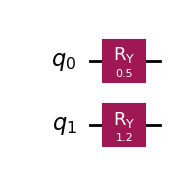

Quantum State Before Encoding [0.5]:


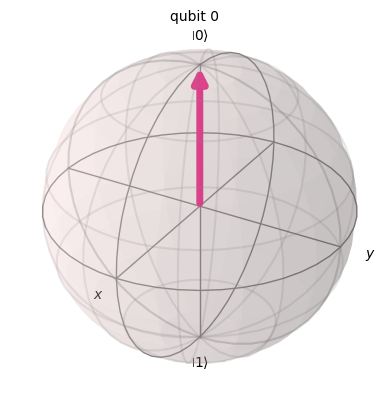

Quantum State After Encoding [0.5]:


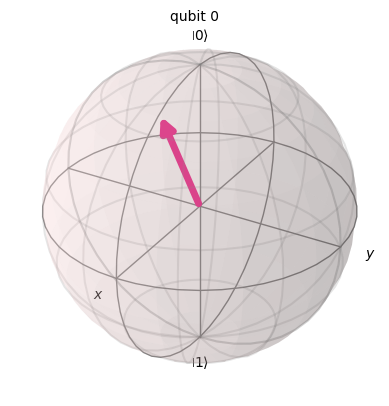

In [4]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector

def angle_encoding(data_point, n_qubits=None):
    """
    Encode a classical data point using angle encoding (Ry rotations)

    Args:
        data_point: Array of features to encode
        n_qubits: Number of qubits to use (defaults to length of data_point)

    Returns:
        Quantum circuit with encoded data
    """
    if n_qubits is None:
        n_qubits = len(data_point)

    # Normalize data to be between 0 and π
    normalized_data = np.array(data_point) % (2*np.pi)

    # Create quantum circuit
    qc = QuantumCircuit(n_qubits)

    # Apply Ry rotations based on data values
    for i in range(min(n_qubits, len(normalized_data))):
        qc.ry(normalized_data[i], i)

    return qc

# Let's test our encoding with a sample data point
sample_point = [0.5, 1.2]
qc = angle_encoding(sample_point)
print("Quantum Circuit for Encoding [0.5, 1.2]:")
display(qc.draw(output='mpl'))

# Create a single-qubit circuit with no gates (initial state |0⟩)
initial_qc = QuantumCircuit(1)
initial_state = Statevector.from_instruction(initial_qc)
print("Quantum State Before Encoding [0.5]:")
display(plot_bloch_multivector(initial_state))

# Visualize the quantum state (for 1 qubit)
single_qubit_qc = angle_encoding([0.5], 1)
state = Statevector.from_instruction(single_qubit_qc)
print("Quantum State After Encoding [0.5]:")
display(plot_bloch_multivector(state))

In [5]:
from helpers import create_quantum_encoding_quiz
create_quantum_encoding_quiz()

HTML(value='\n        <style>\n        .widget-label-basic {\n            overflow: visible !important;\n     …

## 3. Quantum K-means Algorithm

Now let's implement a quantum-enhanced version of k-means clustering. The quantum k-means algorithm uses quantum computing to calculate distances between data points and centroids, potentially providing a speedup for high-dimensional data.

The key steps in quantum k-means are:

1. Encode data points and centroids into quantum states
2. Use quantum circuits to compute the similarity/distance between points
3. Assign points to clusters based on the measured distances
4. Update the centroids classically
5. Repeat until convergence

In [6]:
from helpers import draw_quantum_kmeans_flowchart
draw_quantum_kmeans_flowchart()


Here's a simplified implementation:

In [34]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, state_fidelity
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Function to encode data using angle encoding
def angle_encoding(data_point):
    n_qubits = len(data_point)

    # Normalize data to be between 0 and 2π
    normalized_data = np.array(data_point) % (2*np.pi)

    # Create quantum circuit
    qc = QuantumCircuit(n_qubits)

    # Apply Ry rotations based on data values
    for i in range(n_qubits):
        qc.ry(normalized_data[i], i)

    return qc

# Function to compute quantum state fidelity (similarity) between two data points
def quantum_similarity(point1, point2):
    # Encode both points
    qc1 = angle_encoding(point1)
    qc2 = angle_encoding(point2)

    # Get statevectors
    state1 = Statevector.from_instruction(qc1)
    state2 = Statevector.from_instruction(qc2)

    # Calculate fidelity (overlap) between states
    # Higher fidelity means more similar points
    return state_fidelity(state1, state2)

# Implementation of quantum k-means
def quantum_kmeans(X, n_clusters, max_iter=10):
    n_samples, n_features = X.shape

    # Randomly initialize centroids
    indices = np.random.choice(n_samples, n_clusters, replace=False)
    centroids = X[indices]

    for iteration in range(max_iter):
        # Assign points to clusters using quantum similarity
        distances = np.zeros((n_samples, n_clusters))

        for i in range(n_samples):
            for j in range(n_clusters):
                # Higher similarity means lower distance
                distances[i, j] = 1 - quantum_similarity(X[i], centroids[j])

        # Assign each point to nearest centroid
        labels = np.argmin(distances, axis=1)

        # Update centroids (classical step)
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(n_clusters)])

        # Check convergence
        if np.allclose(centroids, new_centroids, rtol=1e-5):
            break

        centroids = new_centroids

    return labels, centroids

# Scale data to appropriate range for angle encoding
X_scaled = X / np.max(np.abs(X)) * np.pi

# Apply quantum k-means
q_labels, q_centroids = quantum_kmeans(X_scaled, 2, max_iter=10)

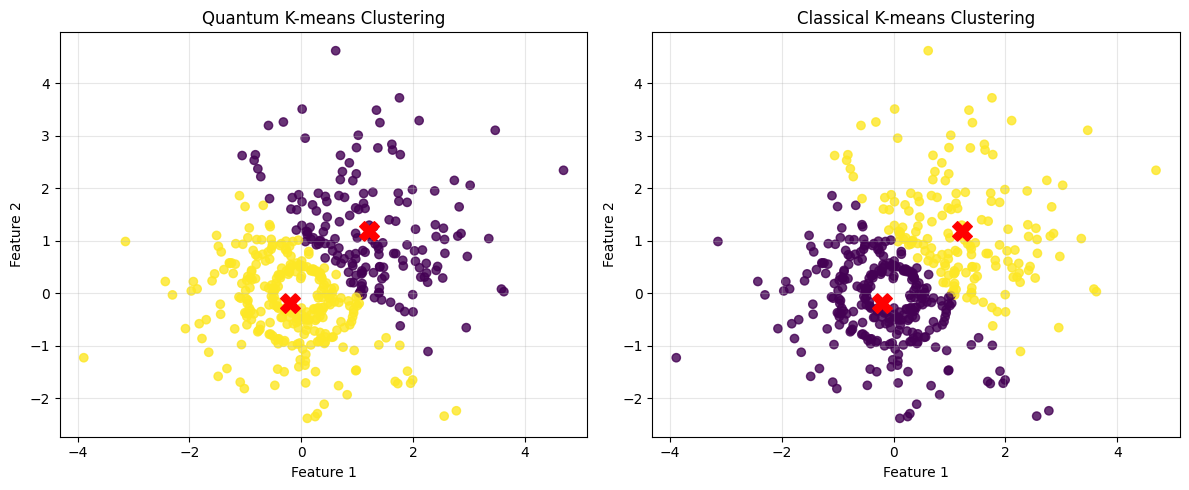

In [35]:
# Visualize results
plt.figure(figsize=(12, 5))

# Plot quantum k-means results
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=q_labels, cmap='viridis', alpha=0.8)
plt.scatter(q_centroids[:, 0] * np.max(np.abs(X)) / np.pi,
            q_centroids[:, 1] * np.max(np.abs(X)) / np.pi,
            c='red', marker='X', s=200)
plt.title('Quantum K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, alpha=0.3)

# Plot classical k-means results
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=classical_labels, cmap='viridis', alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200)
plt.title('Classical K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Analyzing the Quantum K-means Implementation

In our implementation:

1. We use angle encoding to map classical data points to quantum states
2. The quantum similarity function uses state fidelity to measure how similar two data points are
3. The rest of the algorithm follows the classical k-means structure

The key advantage here is that the similarity computation could potentially be more efficient for high-dimensional data on a quantum computer, as quantum state fidelity calculations don't necessarily scale with the number of dimensions.

**What is Fidelity?**
Fidelity is a mathematical measure of how similar two quantum states are:

$$F(\psi, \phi) = |\langle\psi|\phi\rangle|^2$$

It ranges from 0 (orthogonal states) to 1 (identical states).

Think of it as the quantum equivalent of cosine similarity.

In theory, if we have perfect knowledge of both quantum states, we can compute fidelity directly using the formula above — but in a real quantum circuit, we cannot directly access the full quantum state (due to the no-cloning theorem and measurement collapse).

## 4. Distance Computation using Swap Test

Now let's explore a more sophisticated approach for computing similarities between quantum states using the swap test. The swap test is a quantum algorithm that can be used to estimate the overlap between two quantum states. The Swap Test is a quantum algorithm designed to estimate fidelity in practice on a quantum computer without needing to measure the full states.

It works by:

Preparing the two quantum states $|\psi\rangle$ and $|\phi\rangle$

Adding an ancilla qubit and applying a controlled SWAP operation

Measuring the ancilla qubit

$$\text{Pr}(0) = \frac{1 + |\langle\psi|\phi\rangle|^2}{2}$$

From this probability, we extract:

$$|\langle\psi|\phi\rangle|^2 = 2 \cdot \text{Pr}(0) - 1$$

Here's how we can implement it:

In [36]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit import transpile

def swap_test_circuit(qc1, qc2):
    """
    Create a swap test circuit to measure similarity between two quantum states

    Args:
        qc1, qc2: Quantum circuits that prepare the states to compare

    Returns:
        Quantum circuit implementing the swap test
    """
    n_qubits = qc1.num_qubits

    # Create registers
    q_aux = QuantumRegister(1, 'aux')  # Auxiliary qubit
    q_1 = QuantumRegister(n_qubits, 'q1')  # First state
    q_2 = QuantumRegister(n_qubits, 'q2')  # Second state
    c = ClassicalRegister(1, 'c')  # Classical register for measurement

    # Create circuit
    qc = QuantumCircuit(q_aux, q_1, q_2, c)

    # Prepare the auxiliary qubit in superposition
    qc.h(q_aux)

    # Prepare input states
    qc.compose(qc1, q_1, inplace=True)
    qc.compose(qc2, q_2, inplace=True)

    # Apply controlled-SWAP operations
    for i in range(n_qubits):
        qc.cswap(q_aux, q_1[i], q_2[i])

    # Apply H gate to auxiliary qubit
    qc.h(q_aux)

    # Measure auxiliary qubit
    qc.measure(q_aux, c)

    return qc


def quantum_similarity_swap_test(point1, point2, shots=1024):
    """
    Compute similarity between two data points using the swap test

    Args:
        point1, point2: Data points to compare
        shots: Number of measurements

    Returns:
        Similarity score (higher means more similar)
    """
    # Encode data points
    qc1 = angle_encoding(point1)
    qc2 = angle_encoding(point2)

    # Create swap test circuit
    qc = swap_test_circuit(qc1, qc2)

    # Use Qiskit 1.x execution
    simulator = Aer.get_backend('aer_simulator')
    compiled_circuit = transpile(qc, simulator)
    job = simulator.run(compiled_circuit, shots=shots)
    result = job.result()
    counts = result.get_counts()

    # Calculate similarity
    prob_0 = counts.get('0', 0) / shots
    similarity = 2 * prob_0 - 1
    return max(0, similarity)  # Ensure non-negative due to sampling noise

# Let's test our swap test with two data points
point1 = [0.5, 1.2]
point2 = [0.6, 1.0]
similarity = quantum_similarity_swap_test(point1, point2)
print(f"Similarity between {point1} and {point2}: {similarity:.4f}")

# Let's compare with points that should be more different
point3 = [2.5, 0.2]
similarity = quantum_similarity_swap_test(point1, point3)
print(f"Similarity between {point1} and {point3}: {similarity:.4f}")

Similarity between [0.5, 1.2] and [0.6, 1.0]: 0.9844
Similarity between [0.5, 1.2] and [2.5, 0.2]: 0.2207


The Swap Test is called more sophisticated because:

1, It enables indirect measurement of state similarity

2, It uses interference and entanglement

3, It’s actually implementable on real quantum devices, unlike raw fidelity

In [37]:
from helpers import create_quantum_kmeans_quiz
create_quantum_kmeans_quiz()

HTML(value='\n        <style>\n        .widget-label-basic {\n            overflow: visible !important;\n     …

## 5. Implementing Distance-Based Quantum Clustering

Now let's implement a more complete version of quantum k-means using the swap test for similarity calculations:

In [38]:
def quantum_kmeans_with_swap_test(X, n_clusters, max_iter=10, shots=1024):
    n_samples, n_features = X.shape

    # Randomly initialize centroids
    indices = np.random.choice(n_samples, n_clusters, replace=False)
    centroids = X[indices]

    for iteration in range(max_iter):
        print(f"Iteration {iteration+1}/{max_iter}")

        # Assign points to clusters using quantum similarity
        distances = np.zeros((n_samples, n_clusters))

        for i in range(n_samples):
            for j in range(n_clusters):
                # Higher similarity means lower distance
                similarity = quantum_similarity_swap_test(X[i], centroids[j], shots=shots)
                distances[i, j] = 1 - similarity

        # Assign each point to nearest centroid
        labels = np.argmin(distances, axis=1)

        # Update centroids (classical step)
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(n_clusters)])

        # Check convergence
        if np.allclose(centroids, new_centroids, rtol=1e-5):
            print("Converged!")
            break

        centroids = new_centroids

    return labels, centroids

# Scale data to appropriate range for angle encoding
X_scaled = X / np.max(np.abs(X)) * np.pi

# Apply quantum k-means with swap test
q_labels, q_centroids = quantum_kmeans_with_swap_test(X_scaled, 2, max_iter=3, shots=512)

Iteration 1/3


Iteration 2/3
Iteration 3/3


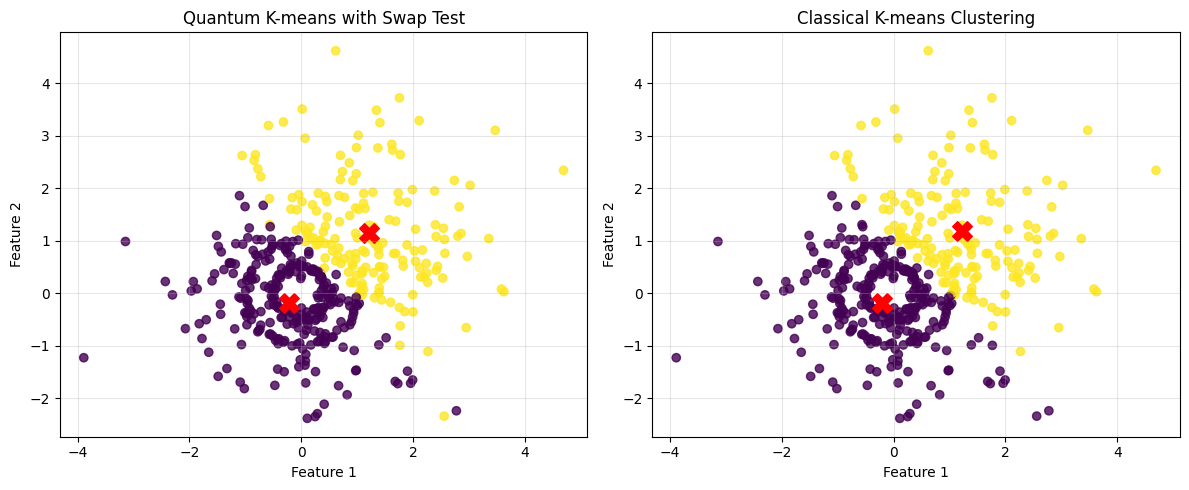

In [39]:

# Visualize results
plt.figure(figsize=(12, 5))

# Plot quantum k-means results
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=q_labels, cmap='viridis', alpha=0.8)
plt.scatter(q_centroids[:, 0] * np.max(np.abs(X)) / np.pi,
            q_centroids[:, 1] * np.max(np.abs(X)) / np.pi,
            c='red', marker='X', s=200)
plt.title('Quantum K-means with Swap Test')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, alpha=0.3)

# Plot classical k-means results for comparison
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=classical_labels, cmap='viridis', alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200)
plt.title('Classical K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Benchmarking: Classical vs Quantum Clustering

In this section, we compare the performance of classical K-means and quantum K-means clustering algorithms using metrics such as inertia (SSE), silhouette score, and runtime.

In [40]:
# Required imports
from sklearn.metrics import silhouette_score
import time
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [41]:
# Classical K-means Benchmark
start_time = time.time()
kmeans = KMeans(n_clusters=2, random_state=42)
classical_labels = kmeans.fit_predict(X)
classical_runtime = time.time() - start_time
classical_inertia = kmeans.inertia_
classical_silhouette = silhouette_score(X, classical_labels)

print(f"Classical K-means Runtime: {classical_runtime:.4f} seconds")
print(f"Classical K-means Inertia (SSE): {classical_inertia:.4f}")
print(f"Classical Silhouette Score: {classical_silhouette:.4f}")

Classical K-means Runtime: 0.0053 seconds
Classical K-means Inertia (SSE): 689.3555
Classical Silhouette Score: 0.3631


In [42]:
# Quantum K-means Benchmark
# Replace this part with your quantum clustering output as 'quantum_labels'
# Assuming you have a function like quantum_kmeans(X, k) -> labels
start_time = time.time()
quantum_labels, quantum_centroids = quantum_kmeans(X_scaled, 2)
quantum_runtime = time.time() - start_time
print("Quantum labels:", quantum_labels)
print("Type:", type(quantum_labels))
print("First few entries:", quantum_labels[:5])
quantum_silhouette = silhouette_score(X_scaled, quantum_labels)

# Note: inertia calculation assumes centroid-based clustering. Skip or approximate.
print(f"Quantum K-means Runtime: {quantum_runtime:.4f} seconds")
print(f"Quantum Silhouette Score: {quantum_silhouette:.4f}")

Quantum labels: [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1
 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1
 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1
 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1
 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0
 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0
 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0
 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0
 1 0 0 0 0 1]
Type: <class 'numpy.ndarray'>
First few entries: [0 1 0 0 0]
Quantum K

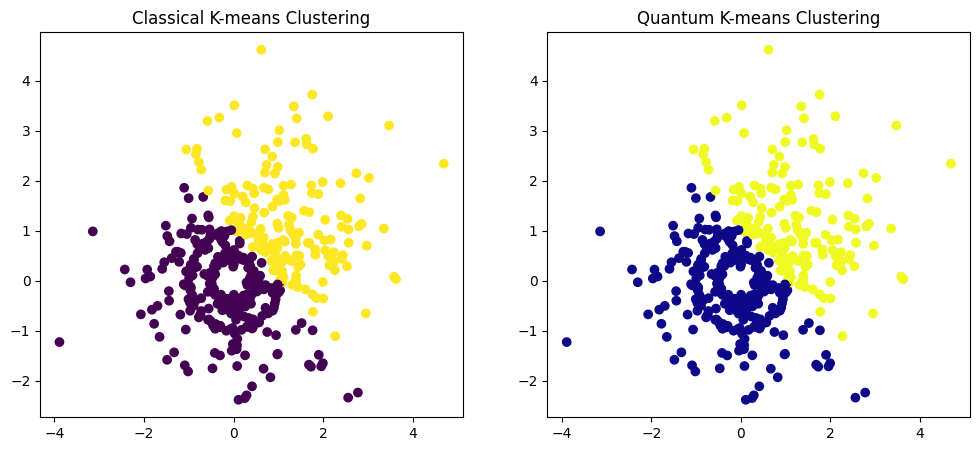

In [43]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(X[:, 0], X[:, 1], c=classical_labels, cmap='viridis')
axes[0].set_title("Classical K-means Clustering")

axes[1].scatter(X[:, 0], X[:, 1], c=quantum_labels, cmap='plasma')
axes[1].set_title("Quantum K-means Clustering")

plt.show()

**Why Classical and Quantum Clustering Results Look Similar**

Although this notebook explores quantum-inspired clustering algorithms such as Quantum K-Means and QAOA-based clustering, the outputs appear very similar to classical K-Means, both visually and in silhouette scores. This is expected behavior, and it’s rooted in a few key factors:

1. **The Nature of the Dataset:**

   The synthetic dataset used in this notebook is bimodal and largely linearly separable. Even though some noise and overlap were introduced, the data does not pose a significant challenge for classical clustering techniques like K-Means, which excel at partitioning convex, spherical clusters in Euclidean space.

   As such, classical K-Means easily finds the global or near-global optimum, and quantum approaches have little room to outperform it here.

2. **Similarity Measures in Quantum K-Means:**

   The quantum clustering in this notebook uses quantum similarity measures (such as state fidelity or the swap test, implemented in the `quantum_similarity` and `quantum_similarity_swap_test` functions) instead of Euclidean distance. For simple, low-dimensional datasets, these quantum similarities often behave similarly to classical distances, especially after scaling and normalization.

3. **Low Feature Complexity:**

   The dataset operates in only 2 dimensions, where even basic algorithms can perform well. Quantum advantage is theorized to emerge when dealing with:
   - High-dimensional data spaces
   - Complex, non-linear cluster boundaries
   - Graph-based or combinatorial problems (e.g., MaxCut, QUBO clustering)

   For example, QAOA may find globally optimal cluster assignments on noisy or constrained graphs where classical solvers get stuck.

**Where Quantum Clustering Might Shine**

Quantum k-means can produce different (and potentially better) clusters than classical k-means on more complex datasets—such as those with non-convex, manifold-shaped, or high-dimensional structures—because quantum similarity measures can capture relationships that Euclidean distance cannot. This difference arises in the similarity calculation and cluster assignment steps, specifically in the functions that compute quantum similarity (such as `quantum_similarity`, `quantum_similarity_swap_test`, and `quantum_kmeans_with_swap_test`).

To observe meaningful differences, you would typically want to:
- Use non-convex or manifold-shaped datasets
- Add non-linear interactions or constraints between cluster members
- Operate in higher dimensions where quantum feature maps may capture richer entanglements or separations


## 7. Quantum Spectral Clustering

While K-means is effective for compact, spherical clusters, it fails when clusters have complex shapes or are not linearly separable. Spectral clustering addresses this limitation by using graph-based similarity and eigenvalue decomposition to find clusters in transformed space.

Quantum computing offers natural advantages for spectral clustering since eigenvalue problems are fundamental quantum operations, potentially providing exponential speedups for large datasets.

### 7.1 Classical Spectral Clustering Refresher

Let's first see where K-means fails and why we need spectral methods:


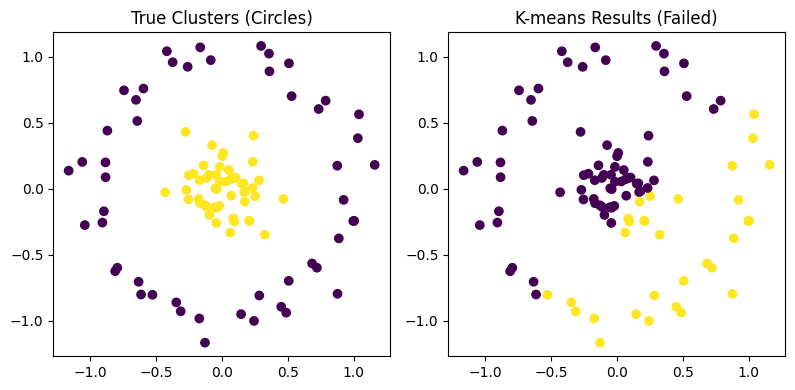

K-means clearly fails on non-convex clusters!


In [44]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create two concentric circles dataset where K-means will fail
X_circles, y_circles = make_circles(n_samples=100, factor=0.2, noise=0.1, random_state=42)

# Try classical K-means on circles
kmeans_circles = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans_circles.fit_predict(X_circles)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, cmap='viridis')
plt.title('True Clusters (Circles)')
plt.axis('equal')

plt.subplot(1, 3, 2)
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-means Results (Failed)')
plt.axis('equal')

plt.tight_layout()
plt.show()

print("K-means clearly fails on non-convex clusters!")


**Classical Spectral Clustering Algorithm:**

1. **Build Similarity Matrix**: Create graph where similar points are connected
2. **Compute Graph Laplacian**: $L = D - W$ where $D$ is degree matrix, $W$ is adjacency matrix
3. **Find Eigenvectors**: Compute smallest eigenvectors of Laplacian
4. **Apply K-means**: Cluster points in transformed eigenspace

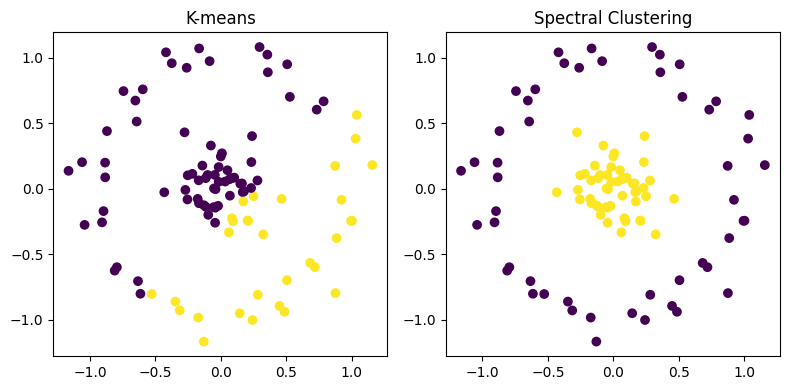

In [45]:
from sklearn.cluster import SpectralClustering

# Apply classical spectral clustering
spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', 
                             n_neighbors=10, random_state=42)
spectral_labels = spectral.fit_predict(X_circles)

# Compare results
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=kmeans_labels, cmap='viridis')
plt.title(f'K-means')
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=spectral_labels, cmap='viridis')
plt.title(f'Spectral Clustering')
plt.axis('equal')

plt.tight_layout()
plt.show()

### 7.2 Quantum Advantage in Spectral Clustering

**Why Quantum Computing for Spectral Methods?**

1. **Natural Eigenvalue Problems**: Quantum computers excel at finding eigenvalues and eigenvectors
2. **Exponential Speedup Potential**: For large matrices, quantum algorithms like HHL can provide exponential advantages
3. **Quantum Similarity**: Use quantum circuits (like swap test) for more sophisticated similarity measures
4. **Parallelism**: Quantum superposition allows exploring multiple eigenvector components simultaneously

**Key Quantum Algorithms for Spectral Clustering:**
- **Quantum Phase Estimation (QPE)**: Find eigenvalues of quantum operators
- **Variational Quantum Eigensolver (VQE)**: Find ground states and eigenvectors
- **HHL Algorithm**: Solve linear systems quantumly

### 7.3 Quantum Spectral Clustering Implementation

Let's implement a quantum-enhanced spectral clustering algorithm:


In [46]:
import numpy as np
from scipy.sparse.linalg import eigsh
from sklearn.cluster import KMeans

def quantum_similarity_matrix(X, shots=1024):
    """
    Compute similarity matrix using quantum swap test
    """
    n_samples = len(X)
    similarity_matrix = np.zeros((n_samples, n_samples))
    
    # Scale data for angle encoding
    X_scaled = X / np.max(np.abs(X)) * np.pi
    
    for i in range(n_samples):
        for j in range(i, n_samples):
            if i == j:
                similarity_matrix[i, j] = 1.0
            else:
                # Use quantum swap test for similarity
                sim = quantum_similarity_swap_test(X_scaled[i], X_scaled[j], shots=shots)
                similarity_matrix[i, j] = sim
                similarity_matrix[j, i] = sim  # Symmetric matrix
    
    return similarity_matrix

def quantum_spectral_clustering(X, n_clusters, shots=512):
    """
    Quantum-enhanced spectral clustering
    """
    print("Computing quantum similarity matrix...")
    
    # Step 1: Compute quantum similarity matrix
    W = quantum_similarity_matrix(X, shots=shots)
    
    # Step 2: Compute graph Laplacian (classical for now)
    D = np.diag(np.sum(W, axis=1))
    L = D - W
    
    # Step 3: Find eigenvectors (using classical method, but could be quantum)
    eigenvals, eigenvecs = eigsh(L, n_clusters, which='SM')
    
    # Step 4: Apply K-means in eigenspace
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(eigenvecs)
    
    return labels

# Apply quantum spectral clustering to circles dataset
print("Applying Quantum Spectral Clustering...")
quantum_spectral_labels = quantum_spectral_clustering(X_circles, n_clusters=2, shots=256)


Applying Quantum Spectral Clustering...
Computing quantum similarity matrix...


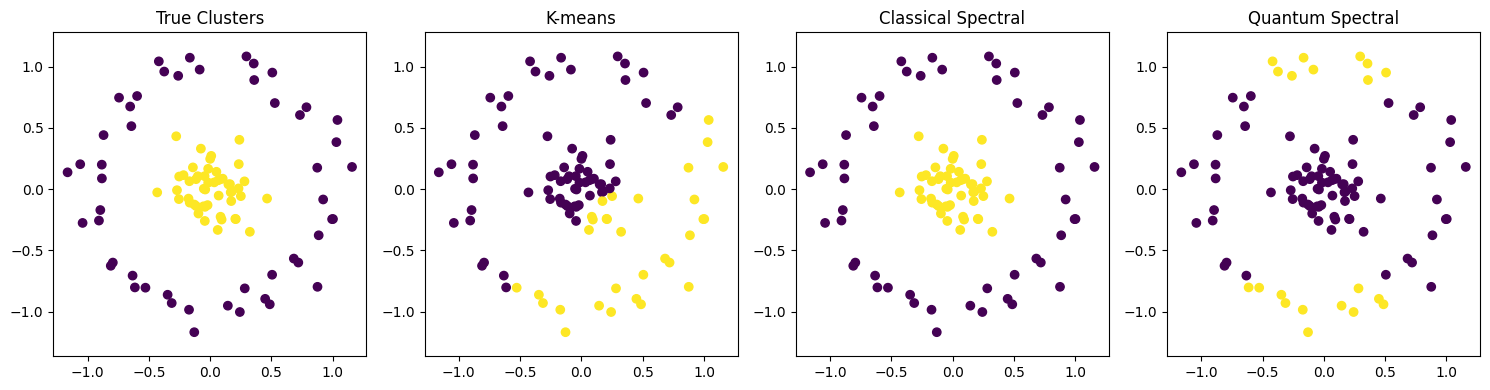

In [47]:
# Compare all methods
plt.figure(figsize=(15, 4))

plt.subplot(1, 4, 1)
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, cmap='viridis')
plt.title('True Clusters')
plt.axis('equal')

plt.subplot(1, 4, 2)
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=kmeans_labels, cmap='viridis')
plt.title(f'K-means')
plt.axis('equal')

plt.subplot(1, 4, 3)
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=spectral_labels, cmap='viridis')
plt.title(f'Classical Spectral')
plt.axis('equal')

plt.subplot(1, 4, 4)
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=quantum_spectral_labels, cmap='viridis')
plt.title(f'Quantum Spectral')
plt.axis('equal')

plt.tight_layout()
plt.show()

In [ ]:
from helpers import create_spectral_clustering_quiz
create_spectral_clustering_quiz()

HTML(value='\n        <style>\n        .widget-label-basic {\n            overflow: visible !important;\n     …

## 8. Practical Challenges and Future Directions

Quantum clustering algorithms face several practical challenges:

1. **Noise and error**: Current quantum devices are noisy, which can affect the accuracy of clustering
2. **Limited qubits**: The number of available qubits limits the size and dimensionality of datasets
3. **Circuit depth**: Deep circuits are prone to errors, limiting the complexity of models
4. **Classical-quantum integration**: Efficient integration of classical and quantum components

Future research directions include:

1. Noise-resilient quantum clustering algorithms
2. Quantum clustering for high-dimensional data
3. Hybrid quantum-classical clustering approaches
4. Application to real-world datasets

## 9. Coding Exercises

Here are some exercises to help you practice concepts from quantum clustering. Each exercise includes a partially completed code snippet and hints to guide your learning.

#### **9.1 - Quantum Similarity Function**

Complete the function below to compute the quantum similarity (fidelity) between two data points using angle encoding and Qiskit.

In [ ]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, state_fidelity

def angle_encoding(data_point):
    n_qubits = len(data_point)
    normalized_data = np.array(data_point) % (2 * np.pi)
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits):
        qc.ry(normalized_data[i], i)
    return qc

def quantum_similarity(point1, point2):
    # TODO: Encode both points as quantum circuits
    # qc1 = ...
    # qc2 = ...
    
    # TODO: Get statevectors from the circuits
    # state1 = ...
    # state2 = ...
    
    # TODO: Compute and return the fidelity (similarity)
    # return ...

    # remove pass after implementing the above steps
    pass

# Example usage:
point_a = [0.2, 1.1]
point_b = [0.3, 1.0]
similarity = quantum_similarity(point_a, point_b)
print(f"Similarity between {point_a} and {point_b}: {similarity}")

Similarity between [0.2, 1.1] and [0.3, 1.0]: None


<details>
<summary><strong>Hint 1: Encoding Data</strong></summary>
Use the <code>angle_encoding</code> function to encode each data point into a quantum circuit.
</details>

<details>
<summary><strong>Hint 2: Statevectors</strong></summary>
Use <code>Statevector.from_instruction(qc)</code> to get the statevector from a quantum circuit.
</details>

<details>
<summary><strong>Hint 3: Fidelity</strong></summary>
Use <code>state_fidelity(state1, state2)</code> to compute the similarity between two quantum states.
</details>

#### **9.2 - Implement a Simple Quantum K-means Step**

Fill in the blanks to assign each data point to the nearest centroid using quantum similarity.

In [ ]:
# Assume X_scaled is your dataset and centroids is a numpy array of current centroids
# Both are already angle-encoded/scaled appropriately

def assign_clusters(X_scaled, centroids):
    n_samples = X_scaled.shape[0]
    n_clusters = centroids.shape[0]
    labels = np.zeros(n_samples, dtype=int)
    for i in range(n_samples):
        similarities = []
        for j in range(n_clusters):
            # TODO: Compute quantum similarity between X_scaled[i] and centroids[j]
            # sim = ...
            similarities.append(sim)
        # TODO: Assign to the cluster with the highest similarity (or lowest distance)
        # labels[i] = ...
    return labels

<details>
<summary><strong>Hint 1: Similarity Calculation</strong></summary>
Use your <code>quantum_similarity</code> function from Exercise 1.
</details>

<details>
<summary><strong>Hint 2: Cluster Assignment</strong></summary>
Use <code>np.argmax(similarities)</code> to assign the label with the highest similarity.
</details>

#### **9.3 - Visualize Quantum Cluster Assignments**

Write a function to visualize the clustering results for a 2D dataset. The function should plot the data points colored by their assigned cluster labels and optionally plot the centroids.

In [ ]:
import matplotlib.pyplot as plt

def plot_clusters(X, labels, centroids=None):
    """
    X: 2D numpy array of data points
    labels: 1D array of cluster assignments
    centroids: (optional) 2D array of centroid positions
    """
    # TODO: Create a scatter plot of X colored by labels
    # plt.scatter(...)
    
    # TODO: If centroids are provided, plot them as red 'X' markers
    # if centroids is not None:
    #     plt.scatter(...)
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Quantum Clustering Results')
    plt.show()

<details>
<summary><strong>Hint 1: Scatter Plot</strong></summary>
Use <code>plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')</code> to plot the data points.
</details>



<details>
<summary><strong>Hint 2: Centroids</strong></summary>
Use <code>plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200)</code> to plot centroids if provided.
</details>

#### **9.4 - Classical K-means Assignment Step**

Complete the function below to assign each data point to the nearest centroid using Euclidean distance (classical k-means step).

In [ ]:
import numpy as np

def classical_assign_clusters(X, centroids):
    """
    X: 2D numpy array of data points
    centroids: 2D numpy array of centroid positions
    Returns: 1D array of cluster assignments
    """
    n_samples = X.shape[0]
    n_clusters = centroids.shape[0]
    labels = np.zeros(n_samples, dtype=int)
    for i in range(n_samples):
        distances = []
        for j in range(n_clusters):
            # TODO: Compute Euclidean distance between X[i] and centroids[j]
            # dist = ...
            distances.append(dist)
        # TODO: Assign to the cluster with the smallest distance
        # labels[i] = ...
    return labels

<details>
<summary><strong>Hint 1: Distance Calculation</strong></summary>
Use <code>np.linalg.norm(X[i] - centroids[j])</code> to compute the Euclidean distance.
</details>

<details>
<summary><strong>Hint 2: Cluster Assignment</strong></summary>
Use <code>np.argmin(distances)</code> to assign the label with the smallest distance.
</details>

#### **9.5 - Quantum Spectral Clustering Similarity Matrix**

Implement a function to compute a quantum similarity matrix for spectral clustering using quantum fidelity.

In [ ]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, state_fidelity

def quantum_angle_encoding_enhanced(data_point, normalization_factor=1.0):
    """Enhanced angle encoding with entanglement for spectral clustering"""
    normalized_data = np.array(data_point) / normalization_factor
    normalized_data = np.abs(normalized_data) * np.pi
    
    n_qubits = len(data_point)
    qc = QuantumCircuit(n_qubits)
    
    # TODO: Apply Ry rotations for each feature
    # for i in range(n_qubits):
    #     qc.ry(...)
    
    # TODO: Add entanglement between adjacent qubits
    # for i in range(n_qubits - 1):
    #     qc.cx(...)
    
    return qc

def quantum_similarity_matrix_spectral(X, normalization_factor=None):
    """Compute quantum similarity matrix for spectral clustering"""
    n_samples = X.shape[0]
    
    if normalization_factor is None:
        normalization_factor = np.max(np.abs(X))
    
    # TODO: Create quantum states for all data points
    quantum_states = []
    # for i in range(n_samples):
    #     qc = quantum_angle_encoding_enhanced(...)
    #     state = Statevector.from_instruction(qc)
    #     quantum_states.append(state)
    
    # TODO: Compute pairwise similarities using state_fidelity
    similarity_matrix = np.zeros((n_samples, n_samples))
    # for i in range(n_samples):
    #     for j in range(n_samples):
    #         similarity_matrix[i, j] = state_fidelity(...)
    
    return similarity_matrix

# Test your implementation
# X_test = np.array([[0.1, 0.2], [0.3, 0.4], [0.5, 0.6]])
# sim_matrix = quantum_similarity_matrix_spectral(X_test)
# print("Quantum similarity matrix:")
# print(sim_matrix)


<details>
<summary><strong>Hint 1: Rotation Gates</strong></summary>
Use <code>qc.ry(normalized_data[i], i)</code> to apply rotation gates to each qubit.
</details>

<details>
<summary><strong>Hint 2: Entanglement</strong></summary>
Use <code>qc.cx(i, i+1)</code> to add controlled-X gates between adjacent qubits.
</details>

<details>
<summary><strong>Hint 3: Quantum States</strong></summary>
Use <code>quantum_angle_encoding_enhanced(X[i], normalization_factor)</code> to create circuits.
</details>

## Conclusion

In this module, we've explored quantum clustering algorithms, focusing on quantum versions of k-means. We've learned how to encode classical data into quantum states, compute similarities using quantum circuits, and implement quantum k-means algorithms.

While current quantum clustering algorithms are limited by available quantum hardware, they show promise for future applications, especially for high-dimensional data.